This end goal of this project is to build models - Logistic Regression, a classical traditional machine learning algorithm and Long Short Term Memory, a deep learning algorithm that can predict the sentiment category or class of texts based on covid19 related tweets

This problem is an instance of multiclass classification; and because each data point should be classified into only one category, the problem is more specifically an instance of single-label, multiclass classification.

The dataset used for this project can be found at https://www.kaggle.com/datatattle/covid-19-nlp-text-classification?rvi=1

Python Libraries Needed for File Opening, Data Analysis, Data Visualization, Data Exploration and Data Cleaning

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = '../input/covid-19-nlp-text-classification/Corona_NLP_train.csv'
test = '../input/covid-19-nlp-text-classification/Corona_NLP_test.csv'

In [3]:
# A copy of the files is preserved inorder to retain an original structure which won't be affected by
# the data processings.

In [4]:
trainOriginal = pd.read_csv(train, encoding='latin-1')
testOriginal = pd.read_csv(test, encoding='latin-1')

In [5]:
train = trainOriginal.copy()
test = testOriginal.copy()

In [6]:
# Earlier attempts to open the files with a utf-8 encoding lead to a unicode error as it couldn't
# parse certain parts of the file, hence, utf-8 was introduced as a solution.

In [7]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [8]:
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [9]:
# The datasets contain 7 columns housing the data info. The UserName and ScreenName has being
# encrypted due to privacy concerns. The tweets contains mentions and hashtags which must be cleaned
# in order to help the models better understand the statistical relationship between the relevant
# details. The sentiment column contains 5 different classes which can be remapped into 3 for better
# statistical understanding. The other columns are the timeframe of the tweets and the location from
# where the tweets where twitted.

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [11]:
# The datas that will have the major effects on how the models determine the classes are non integers
# which means data preprocessing steps needs to be don before feeding them into the models.

In [12]:
train.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [13]:
# The location column contains a whooping 8590 missing rows. Filling the blanks with the most common
# location won't really make sense as the missing details are too much.

In [14]:
train['Location'].value_counts()[:60]

London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
England, United Kingdom    191
Canada                     191
Toronto, Ontario           160
Global                     159
Chicago, IL                155
California, USA            153
San Francisco, CA          152
Boston, MA                 150
New York, USA              140
New Delhi, India           138
Atlanta, GA                126
New York                   126
Mumbai, India              109
Worldwide                  101
Lagos, Nigeria              99
Austin, TX                  98
Houston, TX                 98
Texas, USA                  98
London, UK                  96
Toronto                     91
Los Angeles                 89
Nairobi,

In [15]:
# The location info was splitted and merged because lots of the locations are in the same geolocation,
# The datasets also shows a great reprentative bias. For a global distortion, the bulk of the data 
# collected are within few geopolitical zones with Africa having a little representation. Different 
# ideals, govermental polices, religious beliefs etc are factors that likely influenced the sentiment
# class of individual tweets.

In [16]:
#splitting location into word pairs
train['Location'] = train['Location'].str.split(",").str[0]
test['Location'] = test['Location'].str.split(",").str[0]

In [17]:
train['Location'].value_counts()[:60]

London            1247
New York           709
United States      530
Washington         504
Los Angeles        402
Toronto            346
United Kingdom     342
India              276
Chicago            262
England            255
UK                 246
USA                231
Australia          230
California         211
San Francisco      206
Sydney             202
New Delhi          201
Melbourne          199
Canada             198
Boston             197
Mumbai             197
Atlanta            165
Global             159
Houston            156
Texas              145
Lagos              136
Austin             130
Florida            121
Seattle            120
Nairobi            117
Dallas             115
Philadelphia       114
Manchester         111
Vancouver          106
Scotland           104
New Jersey         103
Worldwide          101
San Diego           99
New York City       95
Dubai               91
Singapore           88
South Africa        87
Portland            86
Denver     

In [18]:
train['TweetAt'].value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [19]:
# The data collected was tweeted between 16th March, 2020 to 14th April, 2020. Any model built and 
# deployed at this time may likely not be relevant for present use due to new findings, researches, 
# tresnd that have emerged which will influence every recent covid19 related tweets. Any model built
# using this data will be a decayed model and further decay will happen at a rapid pace.

In [20]:
train['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [21]:
# Positive > Negative > Neutral and the categories will be remapped to fully represent this position.

Visual Representation of the Training Set

Text(0.5, 1.0, 'Twitted locations')

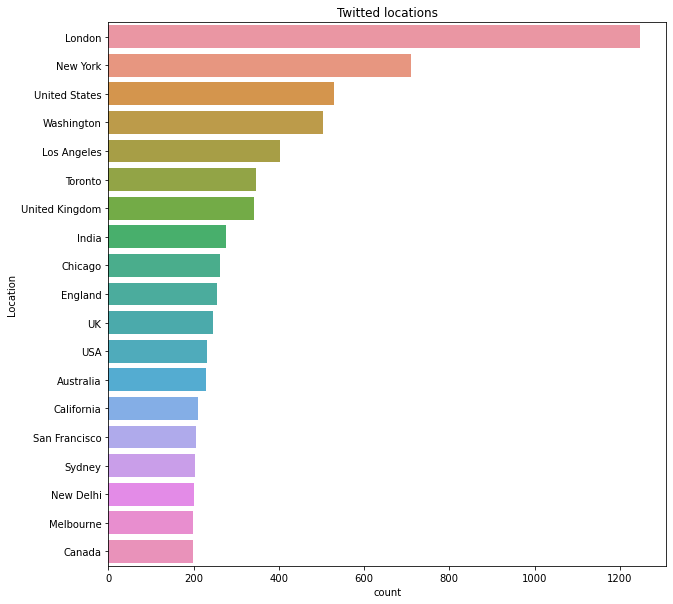

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(y='Location',data=train,order=train.Location.value_counts().iloc[
    0:19].index).set_title("Twitted locations")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

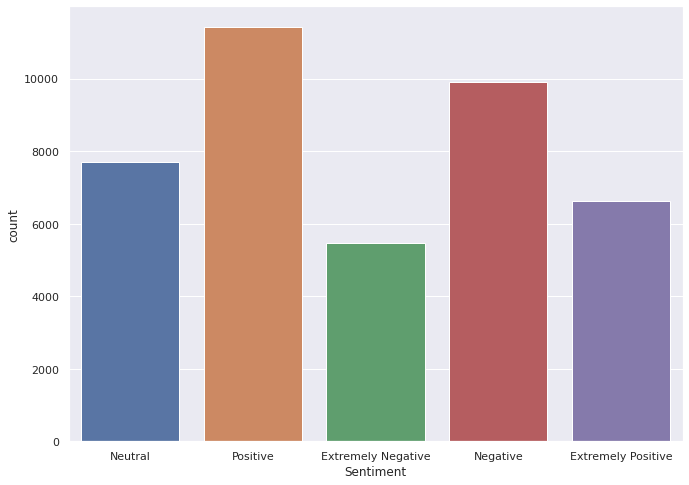

In [23]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11,8)})
sns.countplot(train['Sentiment'])

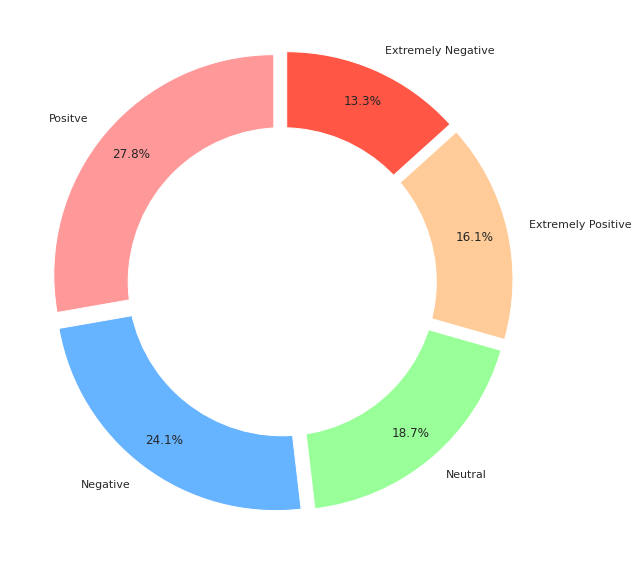

In [24]:
labels = ['Positve', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ff5645']
explode = (0.05,0.05,0.05,0.05,0.05) 
plt.pie(train.Sentiment.value_counts(), colors = colors, labels=labels,
        autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
centreCircle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centreCircle)
plt.tight_layout()
plt.show()

In [25]:
plotDf = train.iloc[:,[2,5]] #[:,[2,5]] is the location and sentiment columns
plotDf

,Location,Sentiment
0,London,Neutral
1,UK,Positive
2,Vagabonds,Positive
3,NaN,Positive
4,NaN,Extremely Negative
...,...,...
41152,Wellington City,Neutral
41153,NaN,Extremely Negative
41154,NaN,Positive
41155,NaN,Neutral


<AxesSubplot:title={'center':'Sentiment Categories of the First 5 Top Locations'}, xlabel='Location', ylabel='count'>

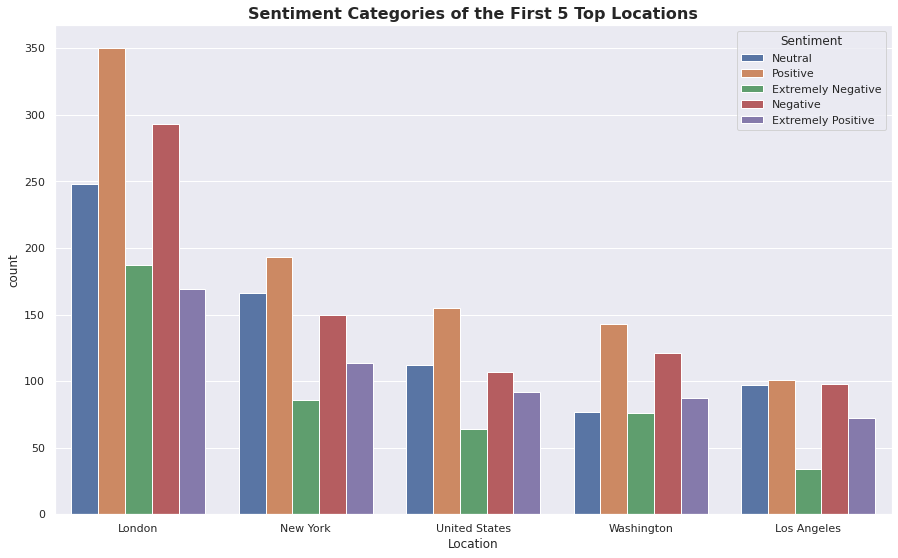

In [26]:
sns.set(rc={'figure.figsize':(15,9)})
gg = train.Location.value_counts()[:5].index
plt.title('Sentiment Categories of the First 5 Top Locations', fontsize=16, fontweight='bold')
sns.countplot(x = 'Location', hue = 'Sentiment', data = plotDf, order = gg)

In [27]:
# Reflecting the insight from train['Sentiment'].value_counts(), positive sentiment dominates the 
# kind of tweets across the locations.

Data Processing for Machine Learning Algorithms

Data processing deals with preparing the input data and targets before feeding them into a machine learning model. Many data-preprocessing and feature-engineering techniques are domain specific (for example, specific to text data).

Data preprocessing aims at making the raw data at hand more amenable to machine learning algorithms. This includes vectorization, normalization, handling missing values, and feature extraction.

Particular to this project is the need to convert the tweets into vector arrays and padded sequences before feeding it into the logistic regression and LSTM models respectively.

Both the test and train set are concatenated together to easily preprocess both together.

Training set will have an identity of 0 while the test set will have 1

In [28]:
train['Identity'] = 0
test['Identity'] = 1 
covid = pd.concat([train, test])
covid.reset_index(drop=True, inplace=True)

In [29]:
covid.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Identity
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,0
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,0
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,0
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0


The 5 sentiment categories are regrouped into 3 for easy data analysis

In [30]:
covid['Sentiment'] = covid['Sentiment'].str.replace('Extremely Positive', 'Positive')
covid['Sentiment'] = covid['Sentiment'].str.replace('Extremely Negative', 'Negative')

The screen and username columns are dropped since they'll have no effect on the accuracy of the model.

In [31]:
covid = covid.drop('ScreenName', axis=1)
covid = covid.drop('UserName', axis=1)
covid

,Location,TweetAt,OriginalTweet,Sentiment,Identity
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0
1,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,0
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,0
3,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,0
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,0
...,...,...,...,...,...
44950,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,1
44951,Farmington,16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,1
44952,Haverford,16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,1
44953,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Negative,1


In [32]:
# The blank rows in the Location column would have being filled with Unknown if it would have had any
# significant impact on the objective of the project
# covid['Location'].fillna('Unknown', inplace=True)

# covid.isnull().sum() would have being used to check and confirm

Visualizing the Concanated Data Set

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

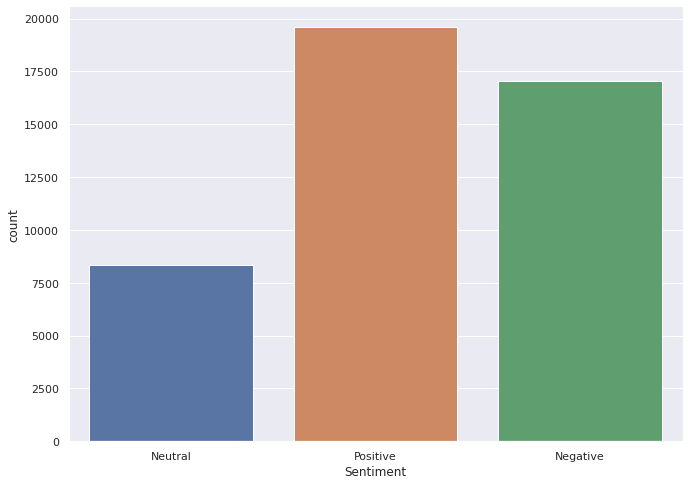

In [33]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11,8)})
sns.countplot(covid['Sentiment'])

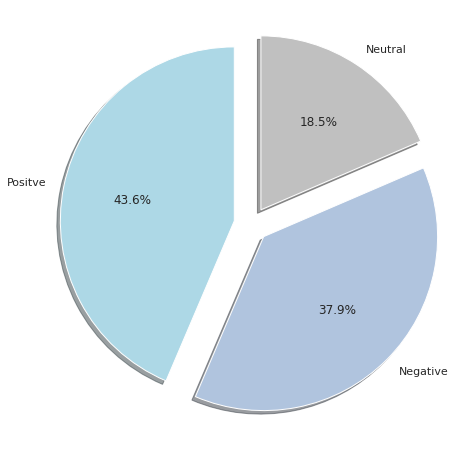

In [34]:
labels = ['Positve', 'Negative', 'Neutral']
colors = ['lightblue','lightsteelblue','silver']
explode = (0.1, 0.1, 0.1)
plt.pie(covid.Sentiment.value_counts(), colors = colors, labels=labels,
        shadow=300, autopct='%1.1f%%', startangle=90, explode = explode)
plt.show()

Text(0.5, 1.0, 'Twitted locations')

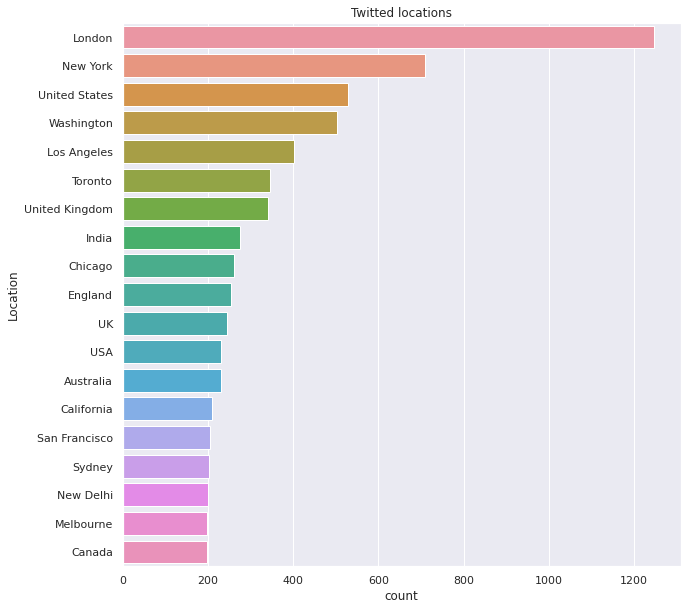

In [35]:
plt.figure(figsize=(10,10))
sns.countplot(y='Location',data=train,order=train.Location.value_counts().iloc[
    0:19].index).set_title("Twitted locations")

The sentiment categories are remapped into three so that the classifiers will be more accurate.

Neutral: 0, Positive: 1, Negative: 2

In [36]:
covid['Sentiment'] = covid['Sentiment'].map({'Neutral':0, 'Positive':1, 'Negative':2})

Further Data Processing and Analysis - top mentions and hashtags in the tweets are extracted and analyzed, after which they will be removed as well as the stop words just to make it easier for the models to discover the statistical relationship between the words.

In [37]:
hashTags=covid['OriginalTweet'].str.extractall(r"(#\S+)")
hashTags = hashTags[0].value_counts()
hashTags[:50]

#coronavirus            13345
#Covid_19                3900
#COVID19                 3470
#Coronavirus             2236
#COVID2019               1772
#toiletpaper             1376
#covid19                 1133
#COVID?19                 893
#CoronaCrisis             720
#CoronaVirus              669
#CoronavirusPandemic      626
#SocialDistancing         615
#covid_19                 477
#CoronavirusOutbreak      442
#pandemic                 410
#panicbuying              403
#CoronaVirusUpdate        341
#lockdown                 340
#Covid19                  336
#StayHomeSaveLives        334
#retail                   329
#coronavirus.             325
#StayAtHome               324
#supermarket              322
#StayHome                 312
#corona                   301
#StopHoarding             275
#socialdistancing         266
#COVID-19                 239
#food                     239
#StopPanicBuying          236
#COVID                    235
#shopping                 228
#covid19UK

In [38]:
# As expected, the bulk of the tweets centres around covid19, it's other generic names, safety
# protocols as well as the different materials needed to weather through the tough times.

In [39]:
mentions = train['OriginalTweet'].str.extractall(r"(@\S+)")
mentions = mentions[0].value_counts()
mentions[:50]

@realDonaldTrump    239
@Tesco              180
@sainsburys         152
@BorisJohnson       141
@narendramodi       110
@asda               103
@amazon              95
@PMOIndia            94
@Morrisons           87
@piersmorgan         84
@YouTube             83
@waitrose            70
@CNN                 56
@AldiUK              52
@FTC                 48
@Walmart             47
@CDCgov              44
@NYGovCuomo          42
@BBCNews             41
@SkyNews             40
@LidlGB              38
@ssupnow             37
@nytimes             37
@MailOnline          36
@WSJ                 34
@Coles               33
@McKinsey            33
@kroger              31
@10DowningStreet     31
@eBay                30
@woolworths          30
@WHO                 30
@MattHancock         28
@Target              27
@POTUS               26
@GMB                 26
@GavinNewsom         25
@NHSuk               24
@GoogleNews          22
@Publix              22
@Canon_India         22
@Ocado          

A python regex function to clean the tweets by removing hashtags, mentions, urls, digits and stop words.

In [40]:
import re

def clean(text):
    text = re.sub(r'http\S+', " ", text)
    text = re.sub(r'@\w+',' ',text)
    text = re.sub(r'#\w+', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub('r<.*?>',' ', text)
    text = text.split()
    text = " ".join([word for word in text if not word in stopWord])
    
    return text

In [41]:
import nltk
from nltk.corpus import stopwords

In [42]:
# Stop words are high-frequency words like a, an, the, to and also that we sometimes want to filter
# out of a document before further processing. Stop words usually have little lexical content and
# do not hold much of a meaning.

# Below is a list of 25 example of semantically non-selective stop words: a, an, and, are, as, at,
# be, by, for, from, has, he, in, is, it, its, of, on, that, the, to, was, were, will, with.

In [43]:
stopWord = stopwords.words('english')

In [44]:
covid['OriginalTweet'] = covid['OriginalTweet'].apply(lambda x: clean(x))

In [45]:
covid.head()

,Location,TweetAt,OriginalTweet,Sentiment,Identity
0,London,16-03-2020,,0,0
1,UK,16-03-2020,advice Talk neighbours family exchange phone n...,1,0
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths give elderly...,1,0
3,NaN,16-03-2020,"My food stock one empty... PLEASE, panic, THER...",1,0
4,NaN,16-03-2020,"Me, ready go supermarket outbreak. Not I'm par...",2,0


Features not needed for the predictions are dropped

In [46]:
covid = covid[['OriginalTweet','Sentiment','Identity']]
covid.head()

,OriginalTweet,Sentiment,Identity
0,,0,0
1,advice Talk neighbours family exchange phone n...,1,0
2,Coronavirus Australia: Woolworths give elderly...,1,0
3,"My food stock one empty... PLEASE, panic, THER...",1,0
4,"Me, ready go supermarket outbreak. Not I'm par...",2,0


Libraries and Frame Works Needed for Further Data Processing, Building a Logistic Regression Model and it's Evaluation

In [47]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

Machine learning models finds statistical relations, therefore the data is tokenized and vectorized as part of the data preprocessing step.

In [48]:
# Lemmatization is the algorithmic process of determining the lemma of a word based on its intended
# meaning. For example, in English, the verb “to walk” may appear as “walk,” “walked,” “walks,” or
# “walking.” The base form, “walk,” that one might look up in a dictionary, is called the lemma for
# the word.

# Tokenization is one of the simple yet basic concepts of natural language processing where texts are
# splitted into meaningful segments.

# Data vectorization deals with the turning of data into tensors. All inputs and targets in a machine
# learning model must be tensors of floating-point data (or, in specific cases, tensors of integers).

In [49]:
covid['Corpus'] = [nltk.word_tokenize(text) for text in covid.OriginalTweet]
lemma = nltk.WordNetLemmatizer()
covid.Corpus = covid.apply(lambda x: [lemma.lemmatize(word) for word in x.Corpus], axis=1)
covid.Corpus = covid.apply(lambda x: " ".join(x.Corpus),axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [50]:
covid.head()

,OriginalTweet,Sentiment,Identity,Corpus
0,,0,0,
1,advice Talk neighbours family exchange phone n...,1,0,advice Talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths give elderly...,1,0,Coronavirus Australia : Woolworths give elderl...
3,"My food stock one empty... PLEASE, panic, THER...",1,0,"My food stock one empty ... PLEASE , panic , T..."
4,"Me, ready go supermarket outbreak. Not I'm par...",2,0,"Me , ready go supermarket outbreak . Not I 'm ..."


The data sets are splitted back into training and test set

In [51]:
train = covid[covid.Identity==0]
test = covid[covid.Identity==1]
train.drop('Identity',axis=1, inplace=True)
test.drop('Identity',axis=1, inplace=True)
test.reset_index(drop=True,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
train.head()

,OriginalTweet,Sentiment,Corpus
0,,0,
1,advice Talk neighbours family exchange phone n...,1,advice Talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths give elderly...,1,Coronavirus Australia : Woolworths give elderl...
3,"My food stock one empty... PLEASE, panic, THER...",1,"My food stock one empty ... PLEASE , panic , T..."
4,"Me, ready go supermarket outbreak. Not I'm par...",2,"Me , ready go supermarket outbreak . Not I 'm ..."


In [53]:
test.head()

,OriginalTweet,Sentiment,Corpus
0,TRENDING: New Yorkers encounter empty supermar...,2,TRENDING : New Yorkers encounter empty superma...
1,"When I find hand sanitizer Fred Meyer, I turne...",1,"When I find hand sanitizer Fred Meyer , I turn..."
2,Find protect loved ones . ?,1,Find protect loved one . ?
3,buying hits City anxious shoppers stock food&a...,2,buying hit City anxious shopper stock food & a...
4,One week everyone buying baby milk powder next...,0,One week everyone buying baby milk powder next...


The train set is splitted to get a validation set.

In [54]:
XTrain = train.Corpus
yTrain = train.Sentiment

XTest = test.Corpus
yTest = test.Sentiment

XTrain, XVal, yTrain, yVal = train_test_split(XTrain, yTrain, test_size=0.2,random_state=42)

In [55]:
XTrain.shape, XVal.shape, yTrain.shape, yVal.shape, XTest.shape, yTest.shape

((32925,), (8232,), (32925,), (8232,), (3798,), (3798,))

In [56]:
vectorizer = CountVectorizer(stop_words='english',ngram_range=(1,2),min_df=5).fit(covid.Corpus)

XTrainVec = vectorizer.transform(XTrain)
XValVec = vectorizer.transform(XVal)
XTestVec = vectorizer.transform(XTest)

Logistic Regression Performance

In [57]:
# Logistic Regression (also called Logit Regression) is commonly used to estimate the probability
# that an instance belongs to a particular class (e.g., what is the probability that this email is
# spam?). If the estimated probability is greater than 50%, then the model predicts that the instance
# belongs to that class (called the positive class, labeled “1”), or else it predicts that it does
# not (i.e., it belongs to the negative class, labeled “0”).

# A Logistic Regression model computes a weighted sum of the input features (plus a bias term), but
# instead of outputting the result directly like the Linear Regression model does, it outputs the
# logistic of this result.
# p = hθ x = σ xTθ
# The logistic—noted σ(·)—is a sigmoid function (i.e., S-shaped) that outputs a number
# between 0 and 1.

In [58]:
logReg = LogisticRegression(random_state=42)

In [59]:
# Cross-validation makes it possible to get not only an estimate of the performance of models,
# but also a measure of how precise this estimate is (i.e., its standard deviation). But cross-
# validation comes at the cost of training models several times, so it is not always possible.

In [60]:
cross_val_score(LogisticRegression(random_state=42),
                XTrainVec, yTrain, cv=10, verbose=1, n_jobs=-1).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.4s finished


0.7989068918605282

In [61]:
model = logReg.fit(XTrainVec, yTrain)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [62]:
print(classification_report(yVal, model.predict(XValVec)))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      1553
           1       0.83      0.84      0.83      3617
           2       0.82      0.79      0.80      3062

    accuracy                           0.80      8232
   macro avg       0.78      0.79      0.78      8232
weighted avg       0.80      0.80      0.80      8232



Fine Tuning the Logistic Regression Model

A great way to do this is by 'Grid Searching' which involves the fiddling with the hyperparameters until a great combination of hyperparameter values is discovered. It can be done simply by using Scikit-Learn’s GridSearchCV. All that's needed is tell it which hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation.

In [63]:
penalty = ['l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)

logRegGrid = GridSearchCV(logReg, hyperparameters, cv=5, verbose=0)

In [64]:
bestModel = logRegGrid.fit(XTrainVec, yTrain)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [65]:
# Best hyperparameters combination

print('Best Penalty:', bestModel.best_estimator_.get_params()['penalty'])
print('Best C:', bestModel.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [66]:
# Final Logistic Regression model performance

yPred = bestModel.predict(XTestVec)

In [67]:
print(classification_report(yTest, bestModel.predict(XTestVec)))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       619
           1       0.78      0.81      0.80      1546
           2       0.80      0.78      0.79      1633

    accuracy                           0.77      3798
   macro avg       0.75      0.75      0.75      3798
weighted avg       0.77      0.77      0.77      3798



In [68]:
# Precision deals with the accuracy of the positive predictions.
# precision = TP / TP + FP
# TP is the number of true positives, and FP is the number of false positives.

# Recall, also called sensitivity or true positive rate (TPR) is the ratio of positive instances that
# are correctly detected by the classifier.
# recall = TP / TP + FN
# TP is the number of true positives FP is the number of false positives and FN is the number of
# false negatives.

# But the metric of choice to measure the performance of the logistic regression model in this
# project is the F1-score.The F1 score is the harmonic mean of precision and recall.
# Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low
# values. As a result, the classifier will only get a high F1 score if both recall and precision are
# high.

In [69]:
# A less concise metric also available is the confusion matrix. The general idea involves counting
# the number of times instances of class A are classified as class B.

#  Implementation:

# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import cross_val_predict

# yPred = bestModel.predict(XTestVec)
# print(confusion_matrix(yTest, yPred))

# NB: it's possible that classification metrics wont't be able to handle a mix of multilabel-indicator
# and multiclass targets.

LONG SHORT TERM MEMORY (LSTM) MODEL

The underlying Long Short-Term Memory (LSTM) algorithm was developed by Hochreiter and Schmidhuber
in 1997; it was the culmination of their research on the vanishing gradient problem. This layer is a variant of the SimpleRNN layer; it adds a way to carry information across many timesteps. Imagine a conveyor belt running parallel to the sequence you’re processing. Information from the sequence can jump onto the conveyor belt at any point, be transported to a later timestep, and jump off, intact,
when you need it. This is essentially what LSTM does: it saves information for later, thus preventing older signals from gradually vanishing during processing (Francois Chollet, Deep Learning with Python).

Libraries and Frame Works Needed for Further Data Processing, Building a LSTM Model and it's Evaluation

In [70]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dropout
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [71]:
lines = []
for line in train['Corpus']:
    lines.append(line)
    
len(lines)

41157

In [72]:
tokenizer = Tokenizer(num_words=5000, lower=True) # Number of words to consider as features
tokenizer.fit_on_texts(train['Corpus'].values)
wordIndex = len(tokenizer.word_index) + 1
print('Found %s unique tokens.' % (wordIndex))

Found 33411 unique tokens.


In [73]:
# Turns the lists of integers into a 2D integer tensor of shape (numWords, maxlen)
XTrain = tokenizer.texts_to_sequences(train['Corpus'].values)
XTrain = pad_sequences(XTrain, maxlen=30) # Cuts off the texts after this number of words

XTest = tokenizer.texts_to_sequences(test['Corpus'].values)
XTest = pad_sequences(XTest, maxlen=30)

In [74]:
# The tokenizer selects the most common 5000 words. The sequences are padded so that they all have
# a uniform length of 30.

In [75]:
XTrain.shape, XTest.shape

((41157, 30), (3798, 30))

In [76]:
yTrain = to_categorical(train['Sentiment'], 3)
yTest = to_categorical(test['Sentiment'], 3)

NEURAL NETWORK

The neural network consists of one embedding layer followed by one LSTM layer with 200 units. A Dropout layer is added for regularizatin to prevent overfitting of the model. The neural architecture ends with a Dense layer having three units to generate the output or prediction classes. The activation used is softmax since it is a single label, multi class problem.

A prominent or distinguishing feature in this neural construct is the Embedding layer. The Embedding layer is best understood as a dictionary that maps integer indices (which stand for specific words) to dense vectors. It takes integers as input, it looks up these integers in an internal dictionary, and it returns the associated vectors. It’s effectively a dictionary lookup.

In [77]:
model= models.Sequential()
model.add(layers.Embedding(wordIndex, 128, input_length=1000))
model.add(layers.LSTM(200))
model.add(Dropout(0.2))
model.add(layers.Dense(3, activation='softmax'))

In [78]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 128)         4276608   
_________________________________________________________________
lstm (LSTM)                  (None, 200)               263200    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 603       
Total params: 4,540,411
Trainable params: 4,540,411
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(lr=0.01),
              metrics=['accuracy'])

In [80]:
# The callbacks parameter implemented monitors the validation loss and stops the training process
# once there is no apparent improvement for 10 epochs. It will also restore the best version of the
# model recorded during training.

In [81]:
history = model.fit(XTrain ,yTrain, batch_size=250, epochs=100, validation_split=0.2,
         callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

Epoch 1/100
132/132 [==============================] - 32s 229ms/step - loss: 1.2315 - accuracy: 0.4213 - val_loss: 0.6739 - val_accuracy: 0.7306
Epoch 2/100
132/132 [==============================] - 29s 222ms/step - loss: 0.5996 - accuracy: 0.7724 - val_loss: 0.4722 - val_accuracy: 0.8381
Epoch 3/100
132/132 [==============================] - 29s 222ms/step - loss: 0.4044 - accuracy: 0.8659 - val_loss: 0.4178 - val_accuracy: 0.8621
Epoch 4/100
132/132 [==============================] - 29s 220ms/step - loss: 0.3490 - accuracy: 0.8847 - val_loss: 0.4392 - val_accuracy: 0.8542
Epoch 5/100
132/132 [==============================] - 29s 223ms/step - loss: 0.2890 - accuracy: 0.9034 - val_loss: 0.4477 - val_accuracy: 0.8585
Epoch 6/100
132/132 [==============================] - 29s 221ms/step - loss: 0.2401 - accuracy: 0.9177 - val_loss: 0.4846 - val_accuracy: 0.8482
Epoch 7/100
132/132 [==============================] - 30s 226ms/step - loss: 0.2014 - accuracy: 0.9321 - val_loss: 0.5490 -

Visualizing the Loss/Accuracy of the Model In-Between Epochs

Text(0.5, 0.98, 'Loss/Accuracy of the LSTM Sentiment Classifier')

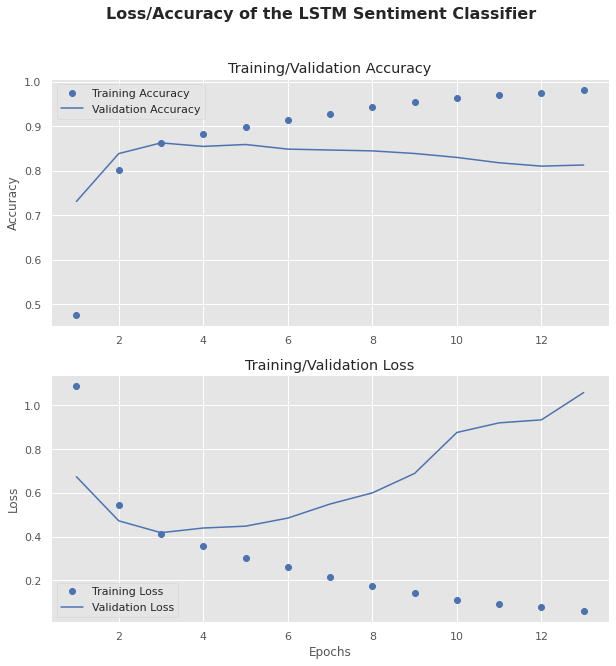

In [82]:
accuracy = history.history['accuracy']
valAccuracy = history.history['val_accuracy']
loss = history.history['loss']
valLoss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
plot = ax1.plot(epochs, accuracy, 'bo', label='Training Accuracy')
ax1.plot(epochs, valAccuracy, 'b', label='Validation Accuracy')
ax1.set(title='Training/Validation Accuracy', ylabel='Accuracy')
ax1.legend()

plot = ax2.plot(epochs, loss, 'bo', label='Training Loss')
ax2.plot(epochs, valLoss, 'b', label='Validation Loss')
ax2.set(title='Training/Validation Loss', ylabel='Loss', xlabel='Epochs')
ax2.legend()

fig.suptitle('Loss/Accuracy of the LSTM Sentiment Classifier', fontsize=16, fontweight = 'bold')

In [83]:
# The model still overfits: In the absence of more data, the overfitting being experienced can probably be
# minimized by reducing the number of layers or by reducing the number of units used in the neural
# architecture. The Dropout can also be increased. Weight regularization via the keras
# kernel_regularizer can also be implemented.

In [84]:
results = model.evaluate(XTest, yTest)

119/119 [==============================] - 2s 20ms/step - loss: 0.4602 - accuracy: 0.8441


In [87]:
print(classification_report(np.argmax(yTest, 1), model.predict_classes(XTest)))

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.80      0.79      0.80       619
           1       0.88      0.84      0.86      1546
           2       0.83      0.87      0.85      1633

    accuracy                           0.84      3798
   macro avg       0.84      0.83      0.83      3798
weighted avg       0.85      0.84      0.84      3798



In [88]:
# A test accuracy score of 0.84 gives a much improved performance compared to the Logistic Regression
# algorithm. A normal slight drop from the 0.87 recorded during validation evaluation.

In [89]:
model.save('./LSTM classifier.h5')
keras.models.load_model('./LSTM classifier.h5')